In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Delhi_Climate.csv')
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.0,1015.666667
1,2013-01-02,7.400000,92.000000,2.98,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333333333334,1018.666667
3,2013-01-04,8.666667,71.333333,1.2333333333333334,1017.166667
4,2013-01-05,6.000000,86.833333,3.6999999999999997,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826086956522,1015.565217
1458,2016-12-29,15.238095,87.857143,6.0,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266666666666667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325,1016.100000


### Створити не менше двох об’єктів TimeSeries, у яких індекси створені за допомогою date_range(). Виділити підмасиви у цих об’єктів.

In [4]:
time_series_index = pd.date_range('2013-01-01', periods = 5, freq = 'MS')
time_series = pd.Series([456, 333, 938, 800, 850], index = time_series_index)
time_series_index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [21]:
# time_series.loc['2013-02-01':'2013-05-01']
time_series.loc['2013-02-01':]

2013-02-01    333
2013-03-01    938
2013-04-01    800
2013-05-01    850
Freq: MS, dtype: int64

In [6]:
summer_time_series_index = pd.date_range('2015-06-01', periods = 13, freq = 'W')
summer_time_series = pd.Series([900, 850, 800, 750, 700, 650, 600, 550, 500, 450, 400, 350, 300], index = summer_time_series_index)
summer_time_series

2015-06-07    900
2015-06-14    850
2015-06-21    800
2015-06-28    750
2015-07-05    700
2015-07-12    650
2015-07-19    600
2015-07-26    550
2015-08-02    500
2015-08-09    450
2015-08-16    400
2015-08-23    350
2015-08-30    300
Freq: W-SUN, dtype: int64

In [22]:
summer_time_series.loc['2015-07'] # лише липень

2015-07-05    700
2015-07-12    650
2015-07-19    600
2015-07-26    550
Freq: W-SUN, dtype: int64

### Побудувати графік зміни середніх денних температур:


In [8]:
mean_temp = pd.read_csv('Delhi_Climate.csv', index_col = 'date', parse_dates = True, usecols = ['date', 'meantemp'])
mean_temp

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


#### а) загальний;

<AxesSubplot:xlabel='date'>

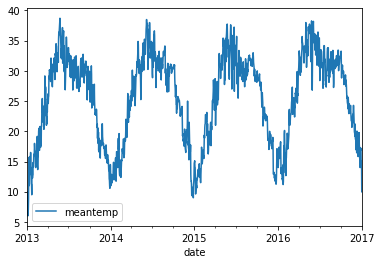

In [9]:
mean_temp.plot()

#### б) за 2014 рік;

<AxesSubplot:xlabel='date'>

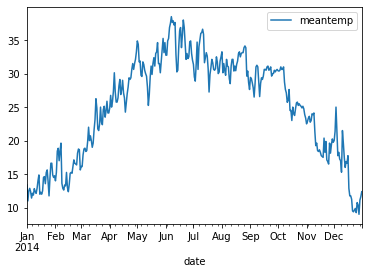

In [10]:
mean_temp.loc['2014'].plot()

#### в) за квітень 2013 року;

<AxesSubplot:xlabel='date'>

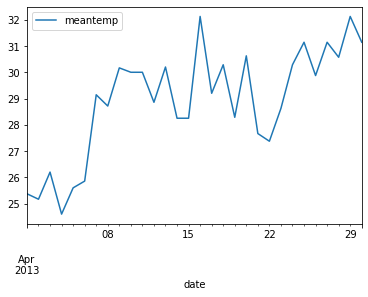

In [11]:
mean_temp.loc['2013-04'].plot()

#### г) за листопад 2013 – травень 2015;

<AxesSubplot:xlabel='date'>

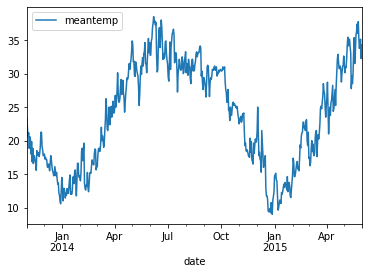

In [12]:
mean_temp.loc['2013-11':'2015-05'].plot()

#### д) за 2015 та 2016 на одному графіку.

<AxesSubplot:xlabel='date'>

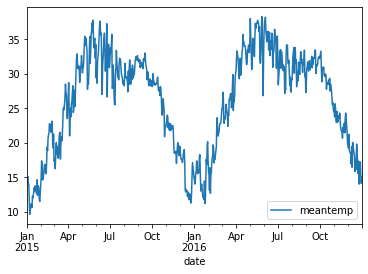

In [13]:
mean_temp.loc['2015':'2016'].plot()

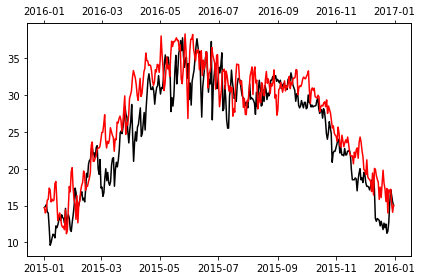

In [14]:
fig, ax1 = plt.subplots()
ax1.plot(mean_temp.loc['2015'], color = 'black')
ax2 = ax1.twiny()
ax2.plot(mean_temp.loc['2016'], color = 'red')
fig.tight_layout()

### Знайти середні значення вологості

In [15]:
humidity = pd.read_csv('Delhi_Climate.csv', index_col = 'date', parse_dates = True, usecols = ['date', 'humidity'])
humidity

,humidity
date,
2013-01-01,84.500000
2013-01-02,92.000000
2013-01-03,87.000000
2013-01-04,71.333333
2013-01-05,86.833333
...,...
2016-12-28,68.043478
2016-12-29,87.857143
2016-12-30,89.666667


#### а) за 2016 рік;

In [16]:
humidity.loc['2016'].mean()

humidity    58.740174
dtype: float64

#### б) за кожний місяць;

<AxesSubplot:xlabel='date'>

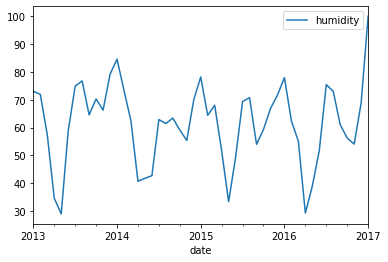

In [23]:
humidity.resample('M').mean().plot()

#### в) за кожні два тижні весни та літа 2014 року.

In [18]:
humidity.loc['2014-03':'2014-08'].resample('2W').mean()

,humidity
date,
2014-03-02,83.142857
2014-03-16,63.723214
2014-03-30,59.250000
2014-04-13,41.543367
2014-04-27,42.857143
2014-05-11,36.492347
2014-05-25,42.383929
2014-06-08,36.991071
2014-06-22,42.982143


#### г) Розрахувати і зобразити зміни вологості у відсотках за кожен день впродовж літа 2015 року.

<AxesSubplot:xlabel='date'>

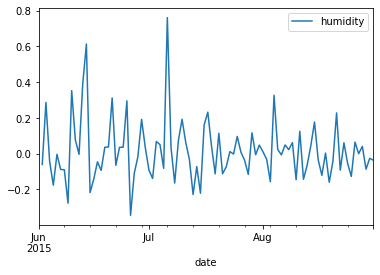

In [19]:
humidity.loc['2015-06':'2015-08'].pct_change().plot()

#### д) Знайти та зобразити графічно ковзне середнє вологості за 2013 рік з вікном в місяць.

<AxesSubplot:xlabel='date'>

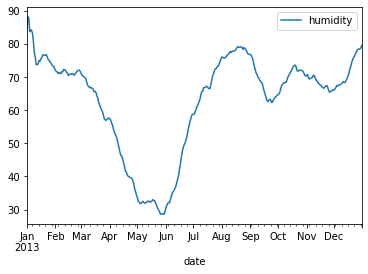

In [20]:
humidity.loc['2013'].rolling('30D').mean().plot()